## Importing the libraries

In [8]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy # For Deprecated Errors

In [11]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA

In [12]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Importing/Unzip the Dataset

To get the dataset, run the following command in the terminal:

1- pip install kaggle

2- Create New API Token in Kaggle Account and place the file in C:/Users/<username>/.kaggle/(.json format)

3- run the following command: kaggle datasets download -d jkraak/bitcoin-price-dataset

In [13]:
# import zipfile
# with zipfile.ZipFile('bitcoin-price-dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('dataset')

In [14]:
main_df = pd.read_csv('dataset/bitcoin_2017_to_2023.csv')

main_df = main_df[::-1]

## Data Analysis

In [15]:

print('Total number of days present in the dataset: ',main_df.shape[0])
print('Total number of fields present in the dataset: ',main_df.shape[1])

Total number of days present in the dataset:  3126000
Total number of fields present in the dataset:  10


In [16]:
main_df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338


In [17]:
main_df.tail()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836


In [18]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 3125999 to 0
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


In [19]:
main_df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


### Checking for null values

In [20]:
print('Null Values:',main_df.isnull().values.sum())

Null Values: 0


In [21]:
print('NA values:',main_df.isnull().values.any())

NA values: False


In [22]:
sd = main_df.iloc[0].iloc[0]
ed = main_df.iloc[-1].iloc[0]

print('Starting Date:', sd)
print('Ending Date:', ed)


Starting Date: 2017-08-17 04:00:00
Ending Date: 2023-08-01 13:19:00


In [23]:
main_df_explore = main_df.copy()
main_df_explore.set_index('timestamp',inplace=True)
main_df_explore.index = pd.to_datetime(main_df_explore.index)

In [24]:
dashboard_data = main_df_explore[['close', 'volume']].resample('D').last()

fig1 = px.line(dashboard_data, x=dashboard_data.index, y='close', labels={'close':'Bitcoin Close Price'})
fig1.update_layout(title='Bitcoin Close Price Trends', xaxis_title='Date', yaxis_title='Price(USD)')

fig2 = px.bar(dashboard_data, x=dashboard_data.index, y='volume', labels={'volume':'Trading Volume'})
fig2.update_layout(title='Bitcoin Trading Volume', xaxis_title='Date', yaxis_title='Volume')

fig1.show()
fig2.show()

## Data Preprocessing

In [25]:
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'])
main_df['Year'] = main_df['timestamp'].dt.year
main_df['Month'] = main_df['timestamp'].dt.month
main_df['Day'] = main_df['timestamp'].dt.day
main_df['Weekday'] = main_df['timestamp'].dt.weekday
main_df['WeekOfYear'] = main_df['timestamp'].dt.isocalendar().week
main_df['Quarter'] = main_df['timestamp'].dt.quarter
main_df['DayOfYear'] = main_df['timestamp'].dt.dayofyear
main_df['IsWeekend'] = (main_df['timestamp'].dt.weekday >= 5).astype(int)
main_df['IsStartOfMonth'] = (main_df['timestamp'].dt.is_month_start).astype(int)
main_df['IsEndOfMonth'] = (main_df['timestamp'].dt.is_month_end).astype(int)
main_df.index.freq = 'D'

In [26]:
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'])

main_df['timestamp_hour'] = main_df['timestamp'].dt.floor('h')

main_df_hourly = main_df.groupby('timestamp_hour').first()

main_df_hourly.index = pd.to_datetime(main_df_hourly.index)

In [27]:
main_df_hourly = main_df_hourly.drop(columns=['timestamp'])
main_df_hourly.sample(1)

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,Year,Month,Day,Weekday,WeekOfYear,Quarter,DayOfYear,IsWeekend,IsStartOfMonth,IsEndOfMonth
timestamp_hour,,,,,,,,,,,,,,,,,,,
2020-04-01 13:00:00,6219.29,6219.29,6214.4,6215.0,56.776333,352947.962148,588,16.02338,99601.913014,2020,4,1,2,14,2,92,0,1,0


In [28]:
main_df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52082 entries, 2017-08-17 04:00:00 to 2023-08-01 13:00:00
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          52082 non-null  float64
 1   high                          52082 non-null  float64
 2   low                           52082 non-null  float64
 3   close                         52082 non-null  float64
 4   volume                        52082 non-null  float64
 5   quote_asset_volume            52082 non-null  float64
 6   number_of_trades              52082 non-null  int64  
 7   taker_buy_base_asset_volume   52082 non-null  float64
 8   taker_buy_quote_asset_volume  52082 non-null  float64
 9   Year                          52082 non-null  int32  
 10  Month                         52082 non-null  int32  
 11  Day                           52082 non-null  int32  
 12  Weekday                  

In [29]:
#testing purposes
main_df_hourly.to_csv('testing.csv')

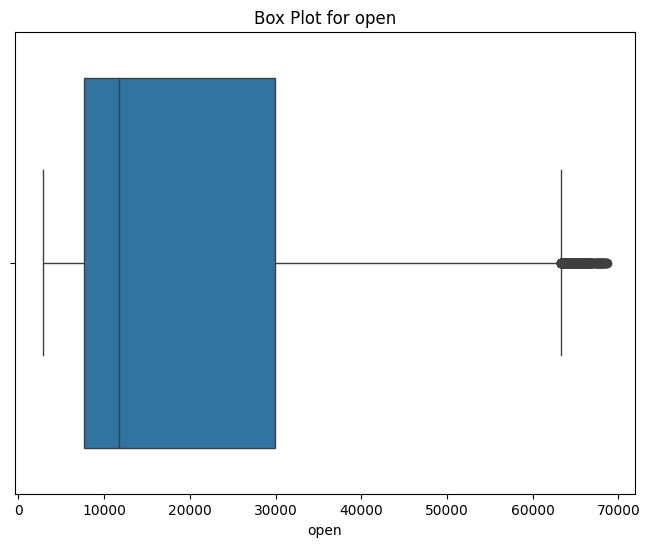

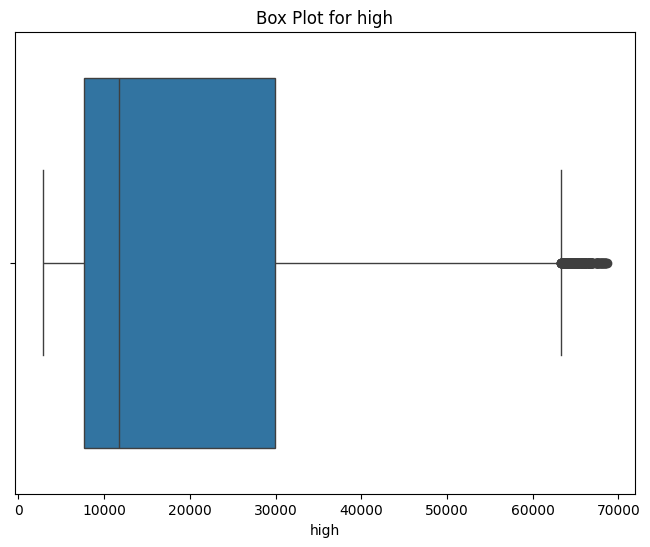

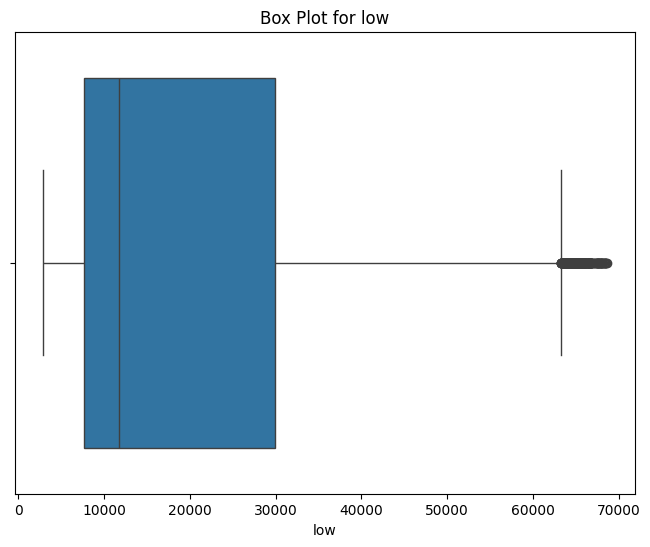

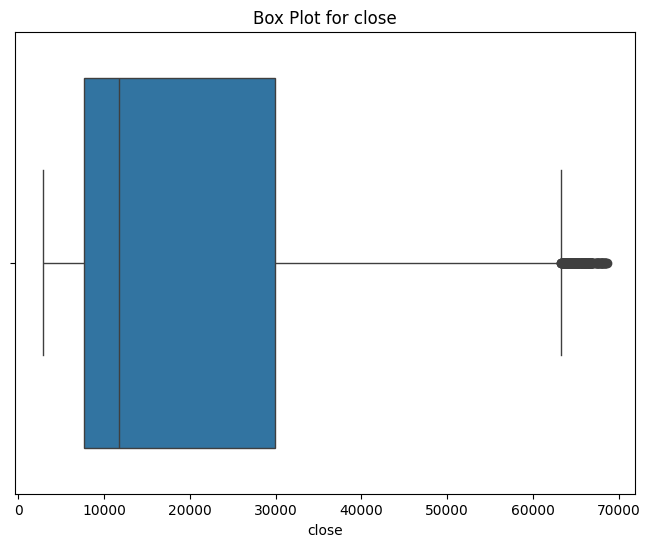

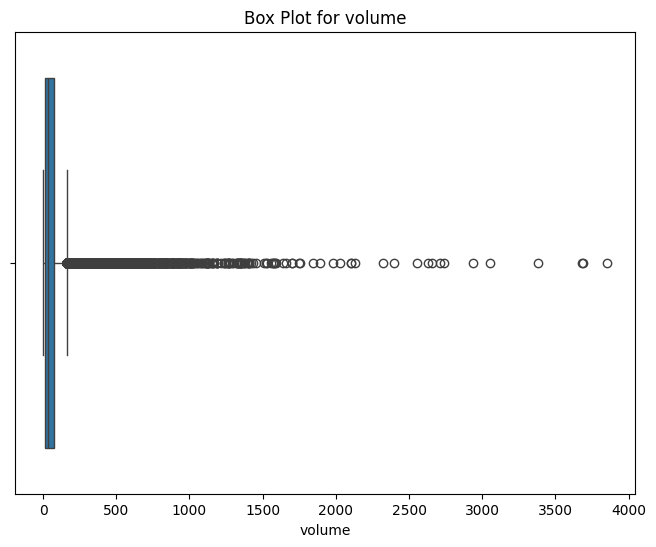

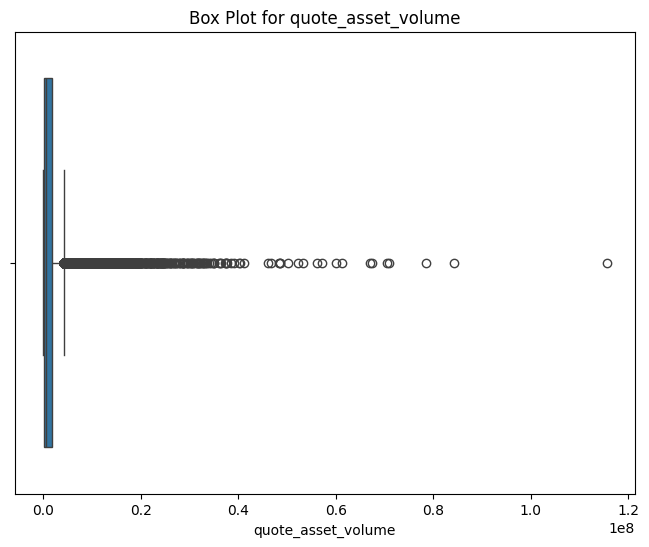

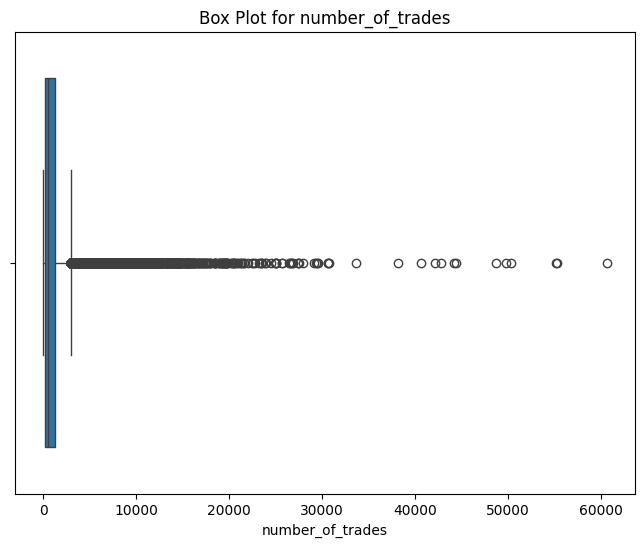

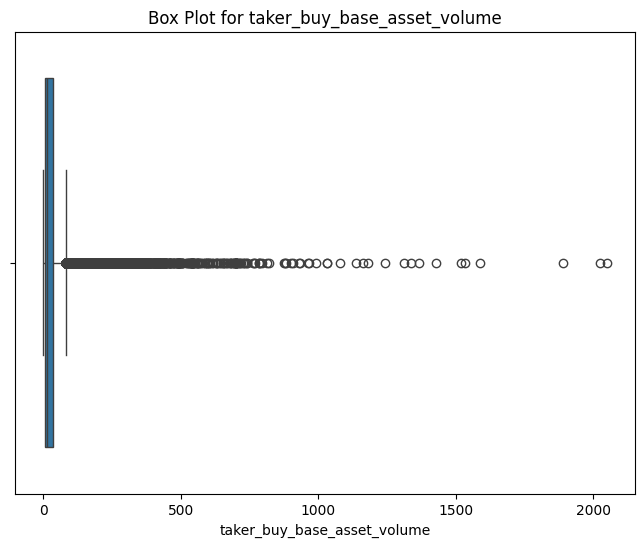

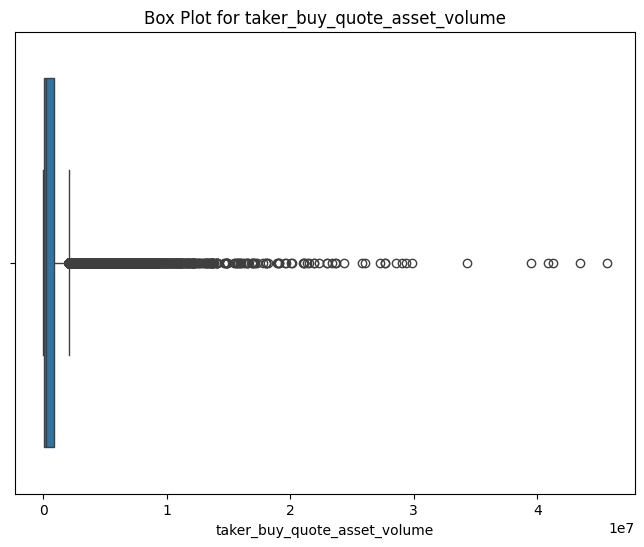

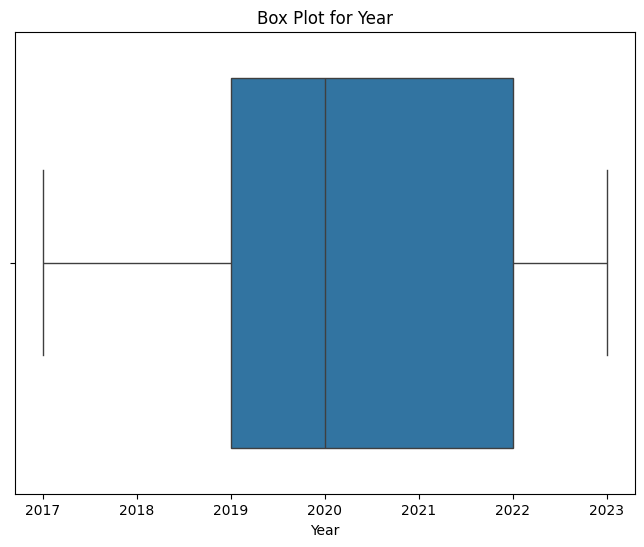

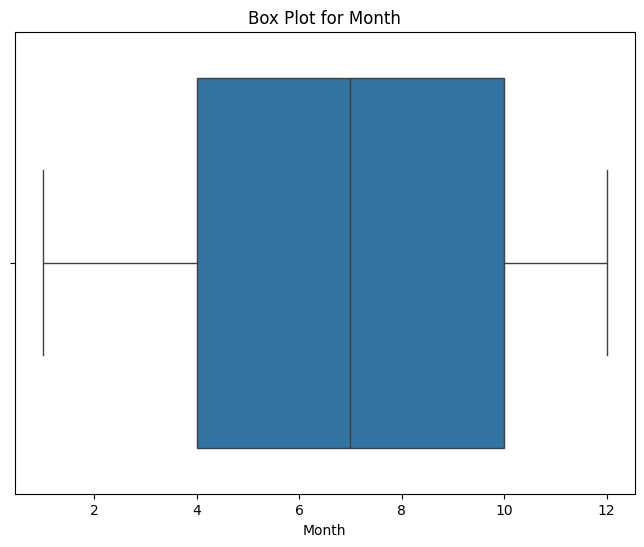

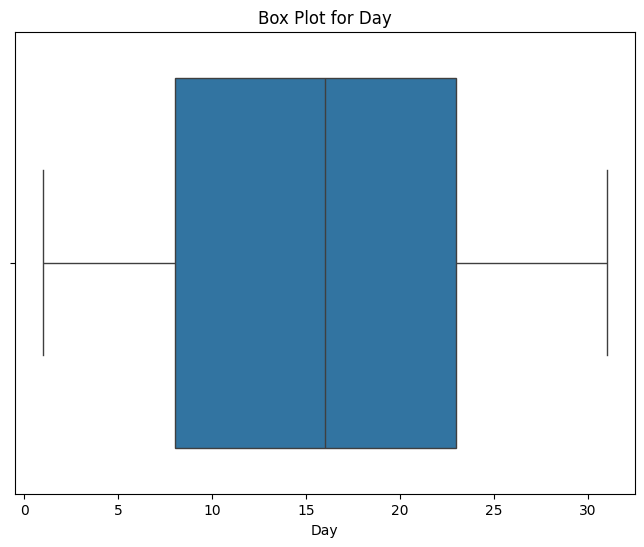

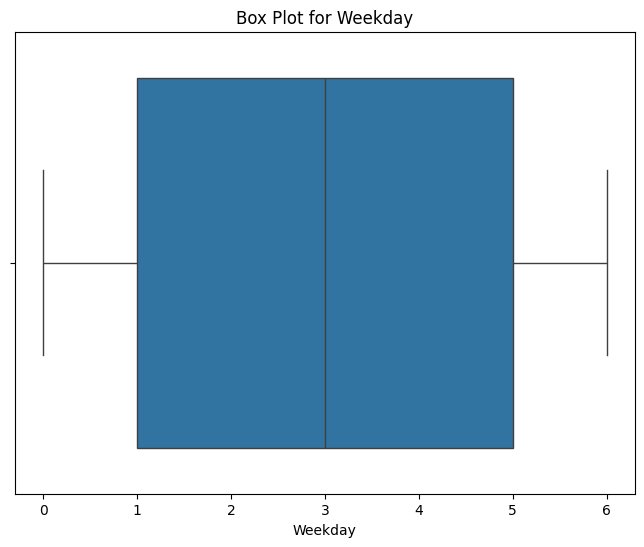

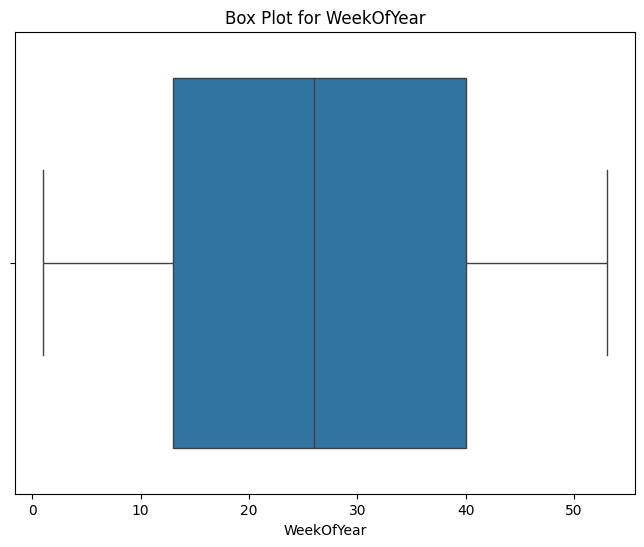

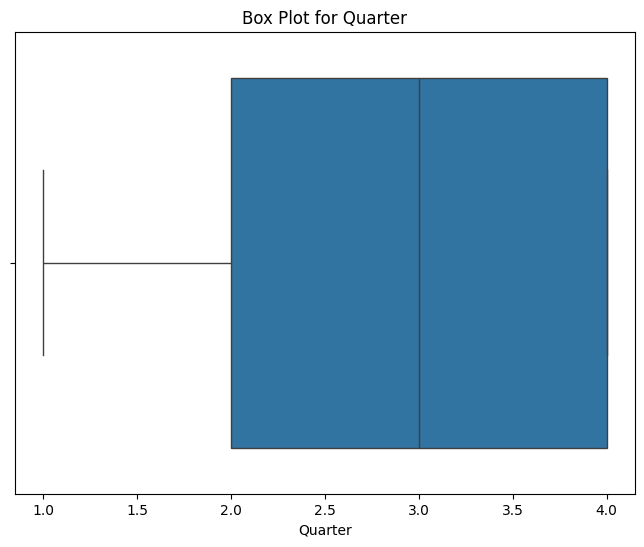

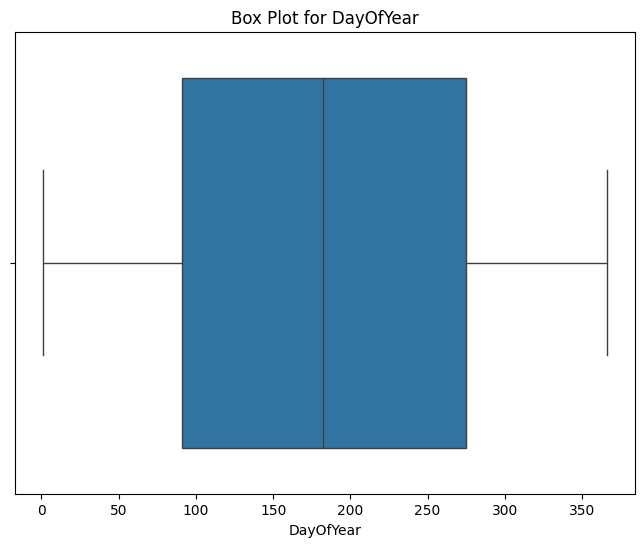

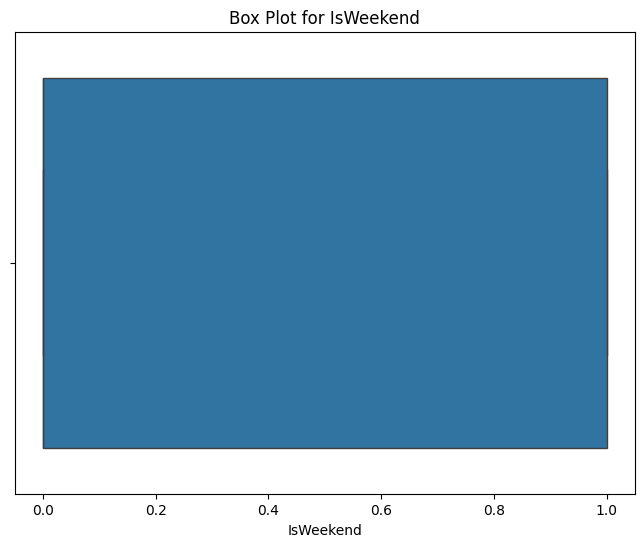

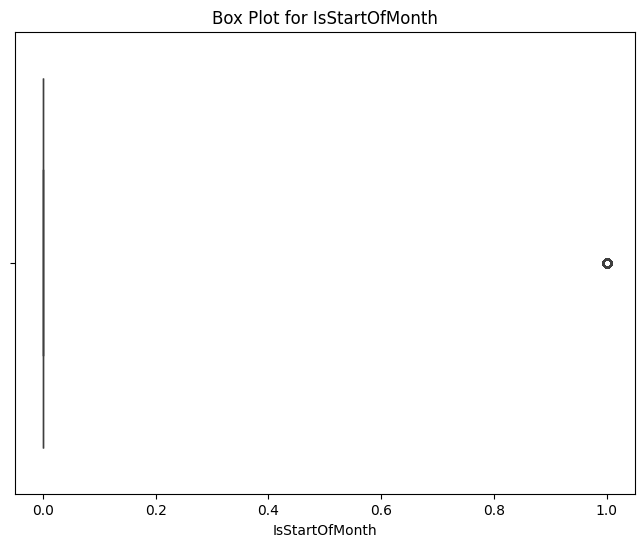

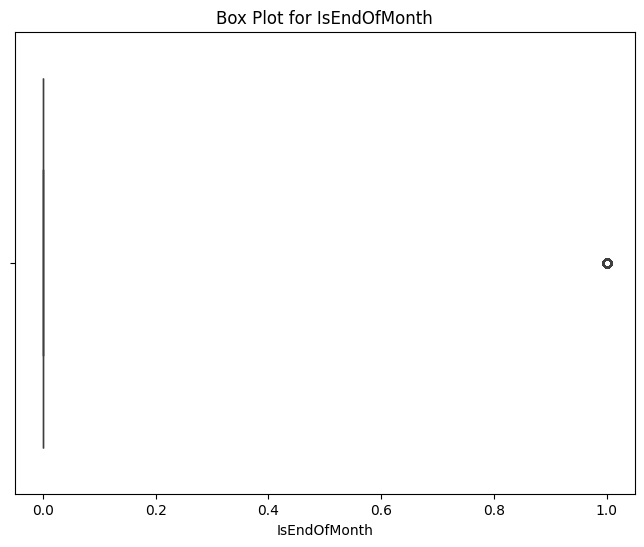

In [30]:
numerical_columns = main_df_hourly.select_dtypes(include='number').columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=main_df_hourly[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [31]:
num_duplicates = main_df_hourly.duplicated().sum()

print(f"\nNumber of duplicate rows: {num_duplicates}")

main_df_no_duplicates = main_df_hourly.drop_duplicates()


Number of duplicate rows: 5


### Date Based Splitting

In [32]:
# # train = main_df_no_duplicates.loc[main_df_no_duplicates.index < pd.Timestamp("2020-01-01")]
# # test = main_df_no_duplicates.loc[main_df_no_duplicates.index >= pd.Timestamp("2020-01-01")]

# fig, ax = plt.subplots(figsize=(15, 5))

# train['close'].plot(ax=ax, label='train')
# test['close'].plot(ax=ax, label='test')
# ax.axvline(pd.Timestamp("2020-01-01"), color='black', ls='--')

# plt.legend(["train", "test"])

# plt.title('Train Test Split')
# plt.show()

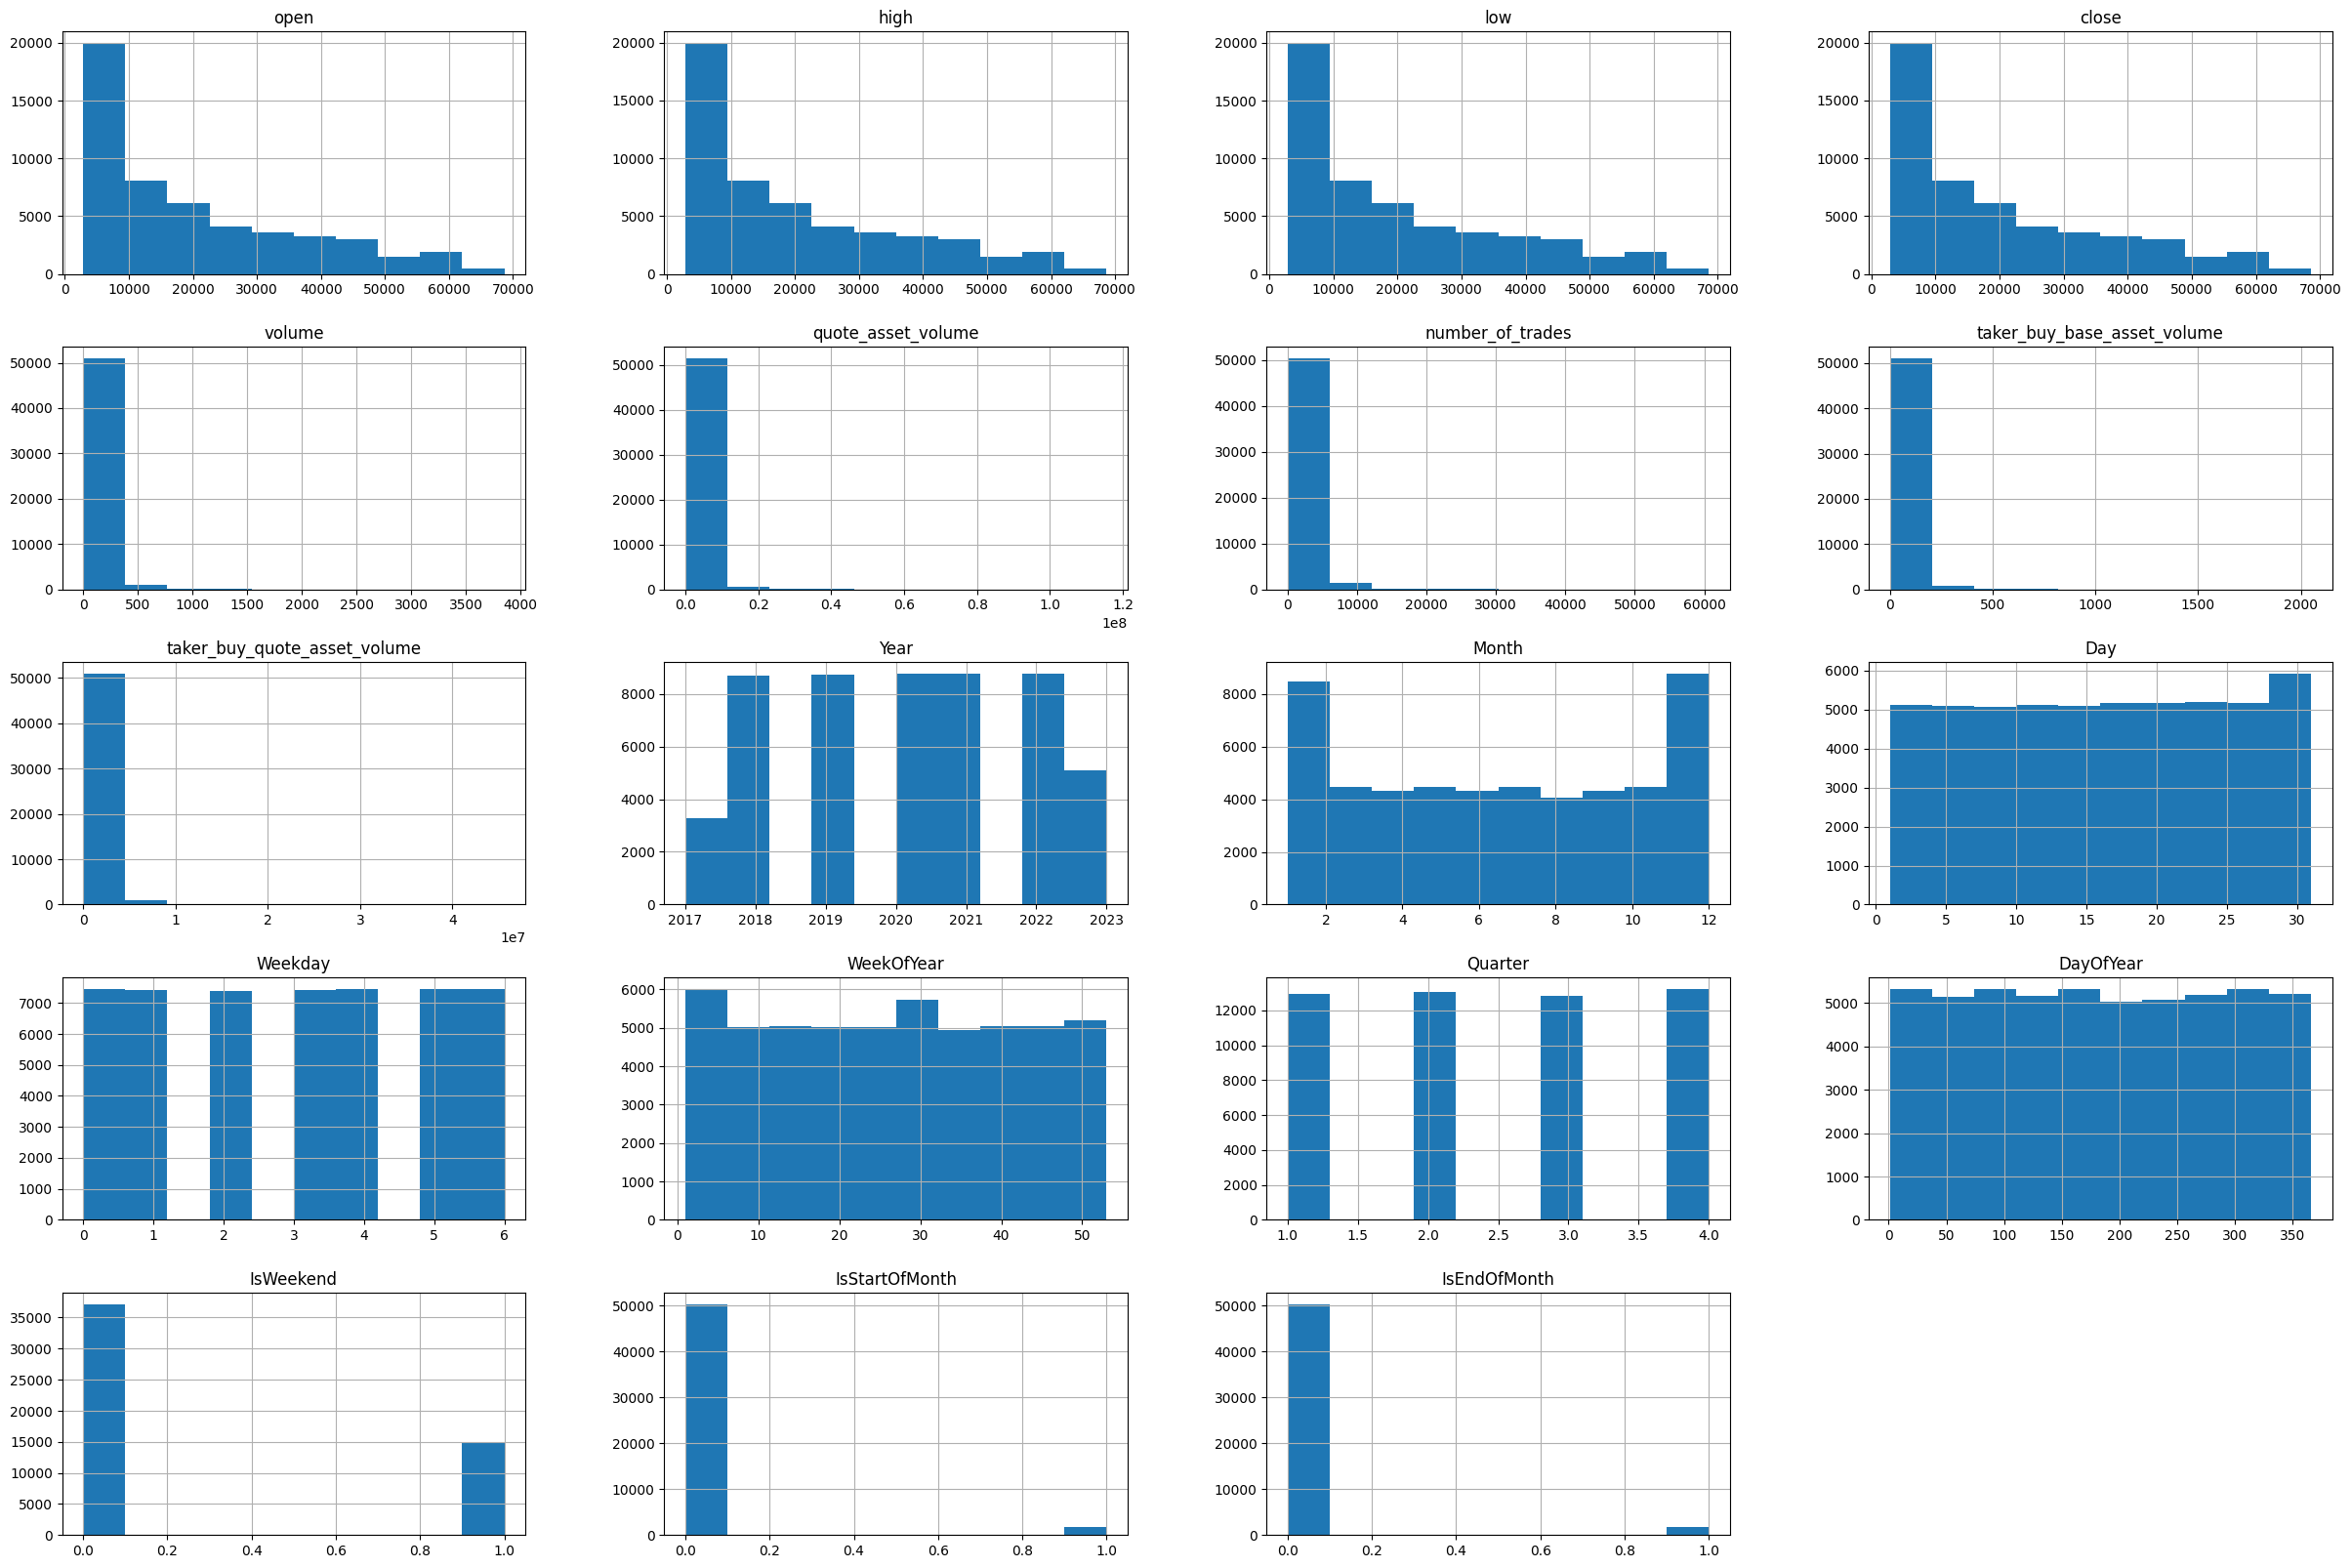

In [33]:
main_df_no_duplicates.hist(figsize=(30,20))
plt.show()

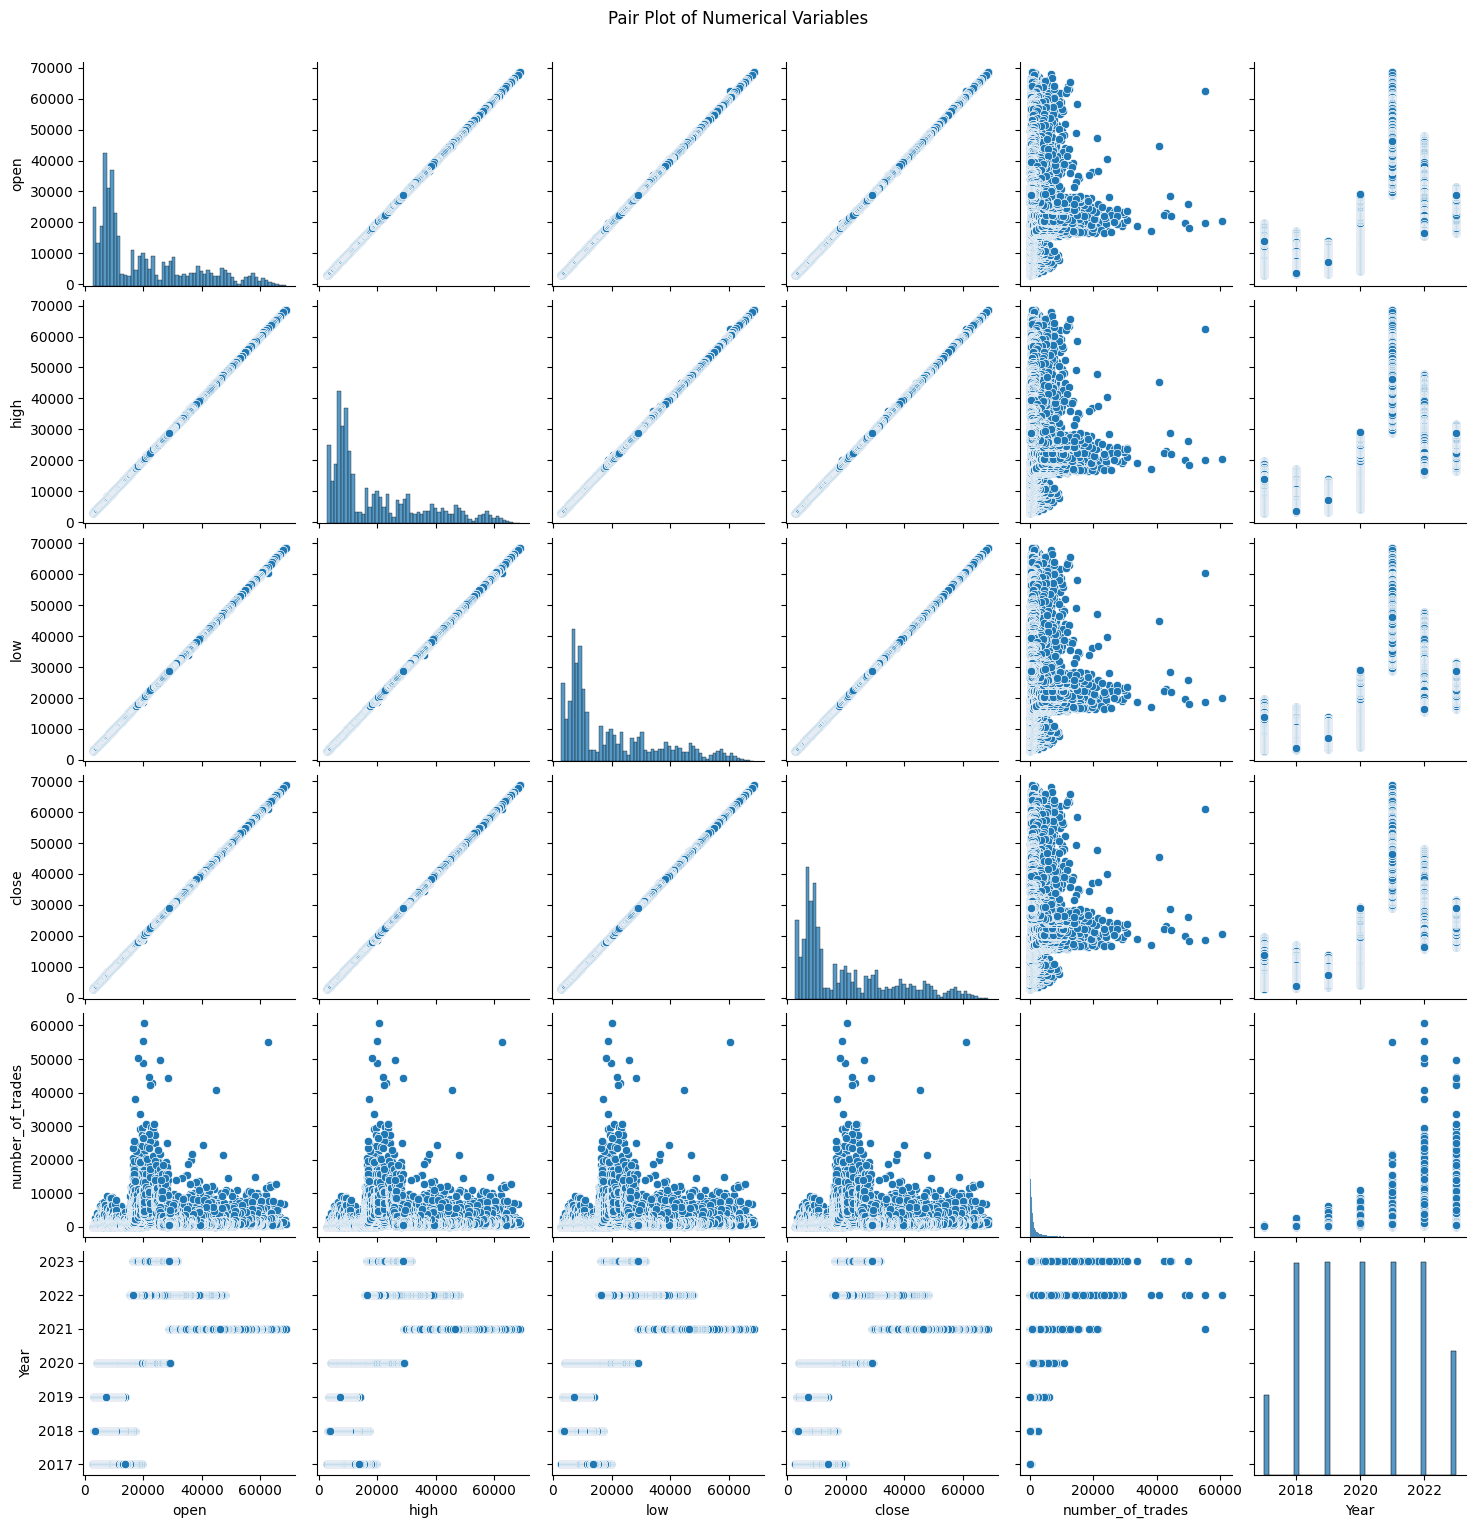

In [34]:
numerical_columns = ['open', 'high', 'low', 'close', 'number_of_trades', 'Year']

sns.pairplot(main_df_no_duplicates[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


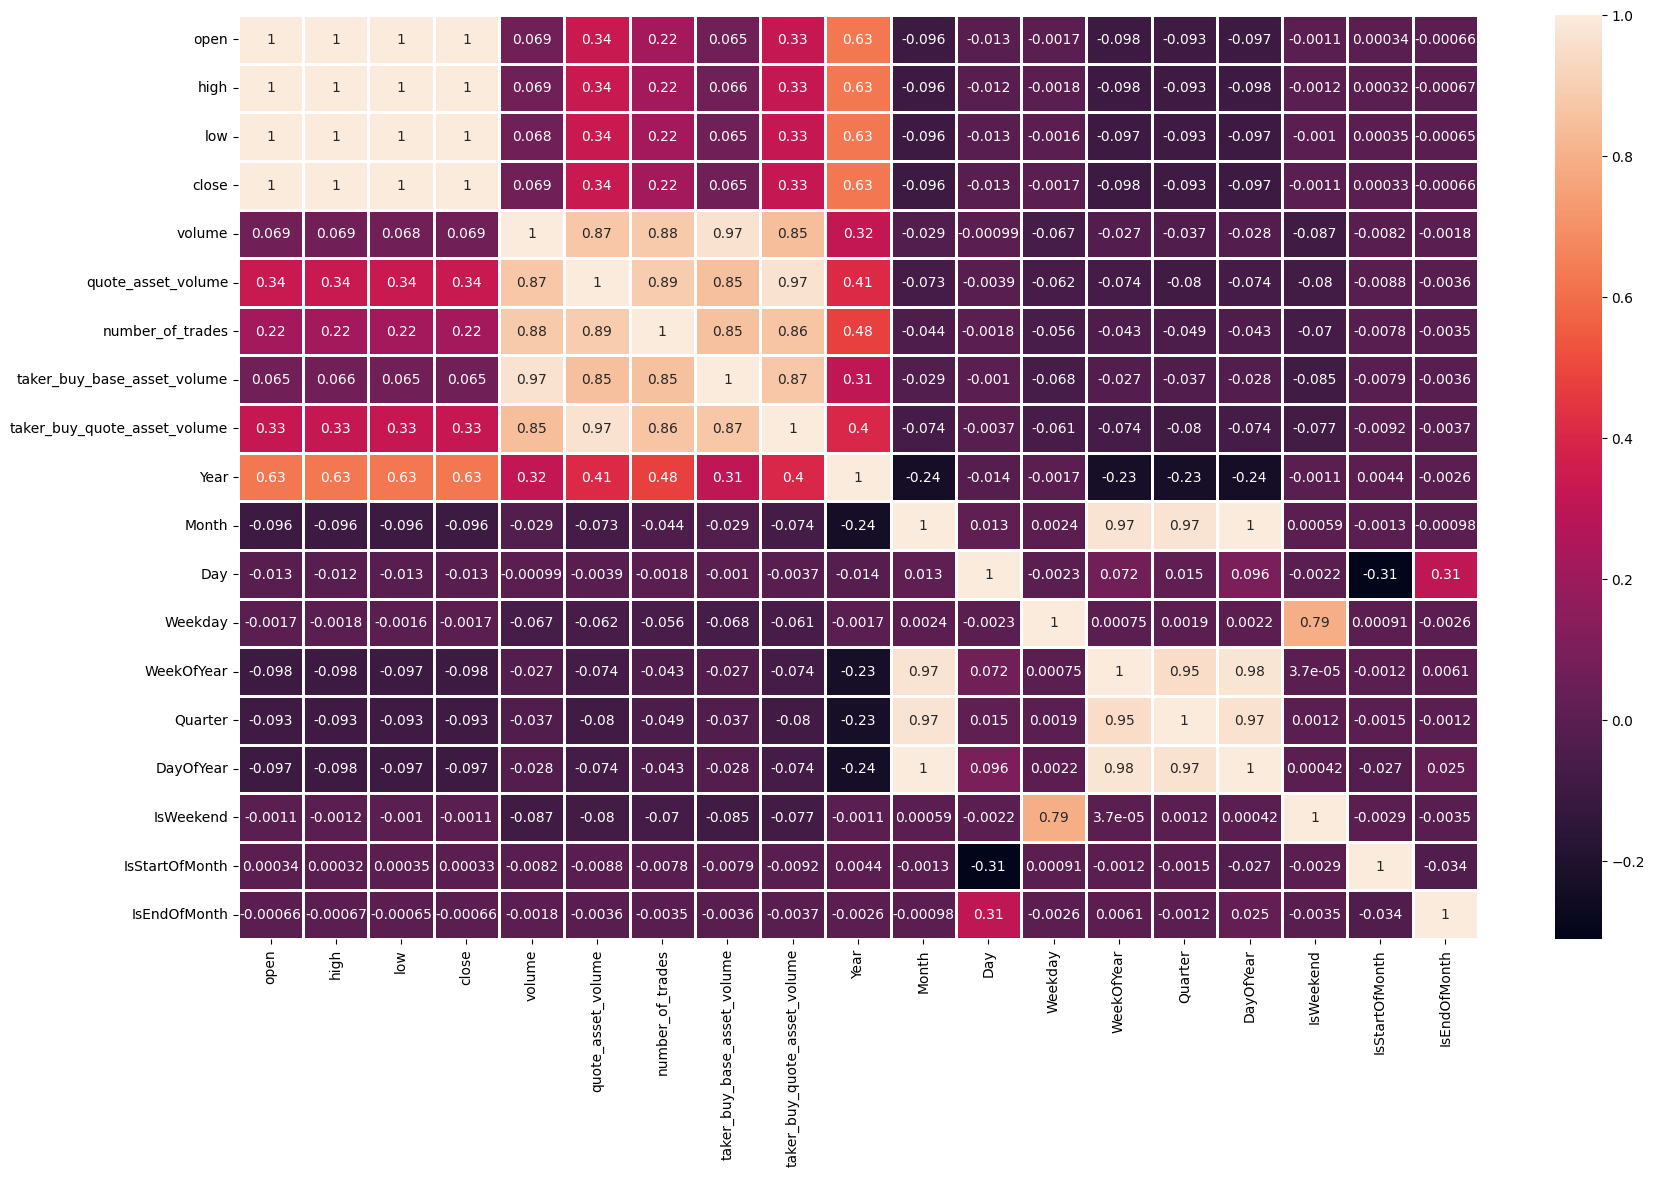

In [35]:
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(main_df_no_duplicates.corr(),annot=True,linewidths=1)
plt.show()

In [36]:
main_df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52077 entries, 2017-08-17 04:00:00 to 2023-08-01 13:00:00
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          52077 non-null  float64
 1   high                          52077 non-null  float64
 2   low                           52077 non-null  float64
 3   close                         52077 non-null  float64
 4   volume                        52077 non-null  float64
 5   quote_asset_volume            52077 non-null  float64
 6   number_of_trades              52077 non-null  int64  
 7   taker_buy_base_asset_volume   52077 non-null  float64
 8   taker_buy_quote_asset_volume  52077 non-null  float64
 9   Year                          52077 non-null  int32  
 10  Month                         52077 non-null  int32  
 11  Day                           52077 non-null  int32  
 12  Weekday                  

In [37]:
# import pandas as pd
# from sklearn.feature_selection import mutual_info_regression, SelectKBest
# from sklearn.model_selection import train_test_split

# X = main_df_no_duplicates.drop(columns=['close'])
# y = main_df_no_duplicates['close']

# mutual_info = mutual_info_regression(X, y)

# k = 10
# selector = SelectKBest(mutual_info_regression, k=k)
# X_selected = selector.fit_transform(X, y)

# selected_indices = selector.get_support(indices=True)
# selected_features = X.columns[selected_indices]

# print("Selected Features:", selected_features)

#### Outliers Removal

In [38]:
def remove_outliers(x_train, y_train, x_test, y_test, contamination=0.05, random_state=42):
    outlier_detector = IsolationForest(contamination=contamination, random_state=random_state)
    
    outliers_mask_train = outlier_detector.fit_predict(x_train) == -1
    
    x_train_no_outliers = x_train[~outliers_mask_train]
    y_train_no_outliers = y_train[~outliers_mask_train]
    
    outliers_mask_test = outlier_detector.predict(x_test) == -1
    
    x_test_no_outliers = x_test[~outliers_mask_test]
    y_test_no_outliers = y_test[~outliers_mask_test]
    
    return x_train_no_outliers, y_train_no_outliers, x_test_no_outliers, y_test_no_outliers

#### Train/Test Split for time series models

In [39]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(main_df_no_duplicates, test_size=0.3, random_state=42)

X_train = train.drop(columns=['close'])
X_test = test.drop(columns=['close'])
y_train = train['close']
y_test = test['close']

print("Original shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Original shapes:
X_train shape: (36453, 18)
X_test shape: (15624, 18)
y_train shape: (36453,)
y_test shape: (15624,)


In [40]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled shapes:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

Scaled shapes:
X_train_scaled shape: (36453, 18)
X_test_scaled shape: (15624, 18)


PCA to reduce dimensionality (under work)  --> in most cases provided low accuracy

In [203]:
# n_components = 10
# pca = PCA(n_components=n_components, random_state=42)
# X_train_pca = pca.fit_transform(xtrain_no_outliers)
# print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))
# X_test_pca = pca.transform(xtest_no_outliers)

### ML Regression Models (XGB Regressor, SVR, Random Forest)

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.svm import SVR


n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

models = {
    'XGB': XGBRegressor(n_estimators=1000, early_stopping_rounds=50, random_state=42),
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {name: {'mse': [], 'mae': [], 'r2': [], 'rmse': []} for name in models}

for train_idx, test_idx in kf.split(main_df_no_duplicates):
    train = main_df_no_duplicates.iloc[train_idx]
    test = main_df_no_duplicates.iloc[test_idx]
    
    X_train, X_val, y_train, y_val = train_test_split(
        train.drop(columns=['close']), train['close'], test_size=0.2, random_state=42)
    
    X_test = test.drop(columns=['close'])
    y_test = test['close']
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_no_outliers, y_train_no_outliers, X_val_no_outliers, y_val_no_outliers = remove_outliers(
        X_train_scaled, y_train, X_val_scaled, y_val)
    
    for name, model in models.items():
        if name == 'XGB':
            model.fit(X_train_no_outliers, y_train_no_outliers, eval_set=[(X_val_no_outliers, y_val_no_outliers)], verbose=False)
        else:
            model.fit(X_train_no_outliers, y_train_no_outliers)
        y_pred = model.predict(X_test_scaled)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = mse ** 0.5
        
        results[name]['mse'].append(mse)
        results[name]['mae'].append(mae)
        results[name]['r2'].append(r2)
        results[name]['rmse'].append(rmse)

for name in models:
    avg_mse = sum(results[name]['mse']) / n_splits
    avg_mae = sum(results[name]['mae']) / n_splits
    avg_r2 = sum(results[name]['r2']) / n_splits
    avg_rmse = sum(results[name]['rmse']) / n_splits
    
    print(f"{name} Average Test Set MSE:", avg_mse)
    print(f"{name} Average Test Set MAE:", avg_mae)
    print(f"{name} Average Test Set R²:", avg_r2)
    print(f"{name} Average Test Set RMSE:", avg_rmse)

XGB Average Test Set MSE: 13429.373862087417
XGB Average Test Set MAE: 63.03780608556127
XGB Average Test Set R²: 0.999947942110263
XGB Average Test Set RMSE: 115.84302514959408
SVR Average Test Set MSE: 240697109.833299
SVR Average Test Set MAE: 10297.035721310209
SVR Average Test Set R²: 0.06680065235426716
SVR Average Test Set RMSE: 15513.826423430019
RandomForest Average Test Set MSE: 513.5425013208505
RandomForest Average Test Set MAE: 11.030541700371566
RandomForest Average Test Set R²: 0.9999980094323713
RandomForest Average Test Set RMSE: 22.628120865891663


### ARIMA (AutoRegressive Integrated Moving Average)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

arima_model = ARIMA(y_train, order=(1, 1, 1))
arima_result = arima_model.fit()

forecast = arima_result.forecast(steps=len(X_test_scaled))

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.show()

In [303]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, forecast)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, forecast)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, forecast)
print("R-squared (Coefficient of Determination):", r2)

Mean Absolute Error (MAE): 13406.579757445083
Mean Squared Error (MSE): 260664772.34275743
R-squared (Coefficient of Determination): -8.59699335324926e-05


### Prophet (Facebook Prophet)

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model 

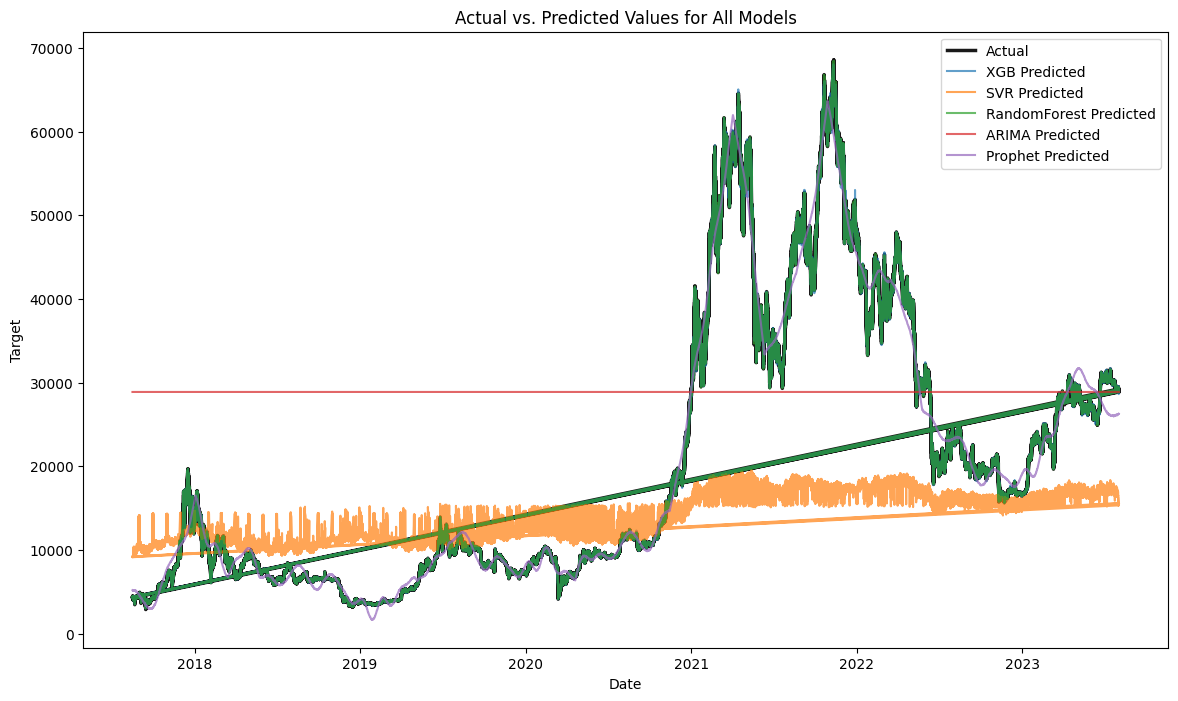

In [44]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming main_df_no_duplicates is already defined
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

models = {
    'XGB': XGBRegressor(n_estimators=1000, early_stopping_rounds=50, random_state=42),
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {name: {'mse': [], 'mae': [], 'r2': [], 'rmse': []} for name in models}
predictions = {name: [] for name in models}

def remove_outliers(X_train, y_train, X_val, y_val):
    # Placeholder function for removing outliers; implement your logic here
    return X_train, y_train, X_val, y_val

for train_idx, test_idx in kf.split(main_df_no_duplicates):
    train = main_df_no_duplicates.iloc[train_idx]
    test = main_df_no_duplicates.iloc[test_idx]
    
    X_train, X_val, y_train, y_val = train_test_split(
        train.drop(columns=['close']), train['close'], test_size=0.2, random_state=42)
    
    X_test = test.drop(columns=['close'])
    y_test = test['close']
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_no_outliers, y_train_no_outliers, X_val_no_outliers, y_val_no_outliers = remove_outliers(
        X_train_scaled, y_train, X_val_scaled, y_val)
    
    for name, model in models.items():
        if name == 'XGB':
            model.fit(X_train_no_outliers, y_train_no_outliers, eval_set=[(X_val_no_outliers, y_val_no_outliers)], verbose=False)
        else:
            model.fit(X_train_no_outliers, y_train_no_outliers)
        y_pred = model.predict(X_test_scaled)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = mse ** 0.5
        
        results[name]['mse'].append(mse)
        results[name]['mae'].append(mae)
        results[name]['r2'].append(r2)
        results[name]['rmse'].append(rmse)
        
        predictions[name].extend(zip(test.index, y_test, y_pred))

# ARIMA Model
train_full = main_df_no_duplicates.drop(columns=['close'])
target_full = main_df_no_duplicates['close']

arima_model = ARIMA(target_full, order=(1, 1, 1))
arima_result = arima_model.fit()

arima_forecast = arima_result.forecast(steps=len(target_full))

# Store ARIMA predictions
predictions['ARIMA'] = list(zip(target_full.index, target_full, arima_forecast))

# Prophet Model
df_copy = main_df_no_duplicates.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy[['timestamp_hour', 'close']]
df_copy.columns = ['ds', 'y']
df_copy['ds'] = pd.to_datetime(df_copy['ds'])

prophet_model = Prophet()
prophet_model.fit(df_copy)

future = prophet_model.make_future_dataframe(periods=0, freq='D')
forecast = prophet_model.predict(future)

# Store Prophet predictions
prophet_predictions = forecast[['ds', 'yhat']]
prophet_predictions = prophet_predictions.set_index('ds')
prophet_predictions = prophet_predictions.join(df_copy.set_index('ds'), rsuffix='_actual')

predictions['Prophet'] = list(zip(prophet_predictions.index, prophet_predictions['y'], prophet_predictions['yhat']))

# Combine all predictions into a single DataFrame for plotting
combined_df = pd.DataFrame()

for name, preds in predictions.items():
    model_df = pd.DataFrame(preds, columns=['Date', 'Actual', 'Predicted'])
    model_df['Model'] = name
    combined_df = pd.concat([combined_df, model_df], ignore_index=True)

# Plot actual vs. predicted values for all models
plt.figure(figsize=(14, 8))

# Plot the actual values once
actual_data = combined_df[['Date', 'Actual']].drop_duplicates()
plt.plot(actual_data['Date'], actual_data['Actual'], label='Actual', color='black', linewidth=2.5, alpha=0.9)

# Plot the predicted values for each model
for name in models.keys():
    model_data = combined_df[combined_df['Model'] == name]
    plt.plot(model_data['Date'], model_data['Predicted'], label=f'{name} Predicted', alpha=0.7)

# ARIMA
arima_data = combined_df[combined_df['Model'] == 'ARIMA']
plt.plot(arima_data['Date'], arima_data['Predicted'], label='ARIMA Predicted', alpha=0.7)

# Prophet
prophet_data = combined_df[combined_df['Model'] == 'Prophet']
plt.plot(prophet_data['Date'], prophet_data['Predicted'], label='Prophet Predicted', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Target')
plt.title('Actual vs. Predicted Values for All Models')
plt.legend()
plt.show()
